## scratchpad / working notebook

In [1]:
from imports import *
import prepare

import acquire
import warnings
warnings.filterwarnings('ignore')

canva_palette = ['#FFB000', '#375F00', '#707E00', '#B39B00', '#002729']
#background_color = '#B39B00'
#sns.set(rc={'figure.facecolor': background_color, 'axes.facecolor': background_color})

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df = acquire.get_data()

Reading from local CSV...


In [3]:
def prep_data(df):
    
    # rename columns: lower case, remove space
    for col in df.columns:
        df = df.rename(columns={col: col.lower().replace(' ', '_')})
        
    # cast date columns as datetime type
    df.order_date = pd.to_datetime(df.order_date)
    df.ship_date = pd.to_datetime(df.ship_date)
        
    # make datetime index
    df.index = df.order_date
    
    # add profit per product column
    df['profit_per_product'] = df.profit / df.quantity
    
    # add sales per product
    df['sales_per_product'] = df.sales / df.quantity
    
    return df

In [4]:
def split_data(df):
    '''
    Splits data into train and test based on year.
    '''
    train = df['2014':'2016']
    test = df['2017']
    return train, test

In [5]:
df = prep_data(df)

In [6]:
train, test = split_data(df)

In [7]:
train.shape

(1238, 23)

In [8]:
test.shape

(496, 23)

#### I'm not sure if there is a solid justification for removing outliers in this project. However, there are substantial outliers that made visualizing distributions difficult. So i thought i'd give it a try.

In [9]:
col_list = ['sales', 'profit']
train, test = prepare.remove_outliers(train, test, 1.5, col_list)

train	 n = 974
test	 n = 412


In [10]:
furniture = train[train.category == 'Furniture']
technology = train[train.category == 'Technology']
office = train[train.category == 'Office Supplies']

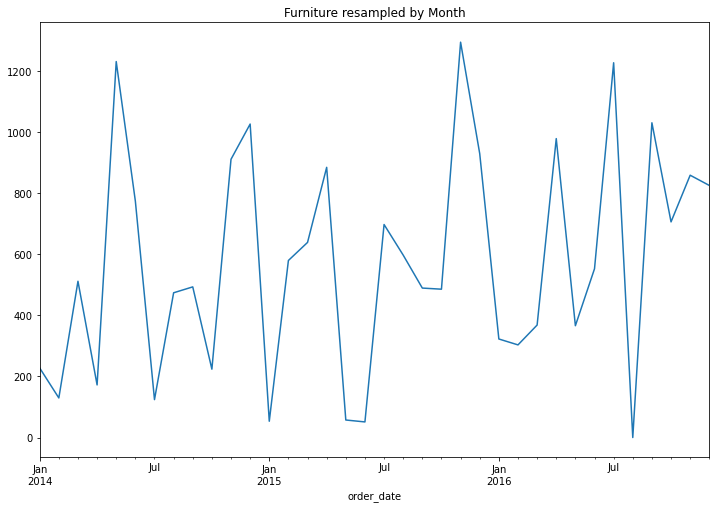

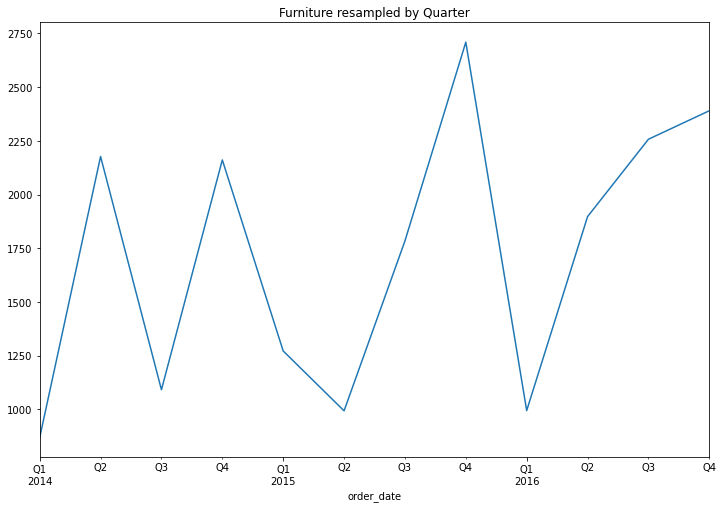

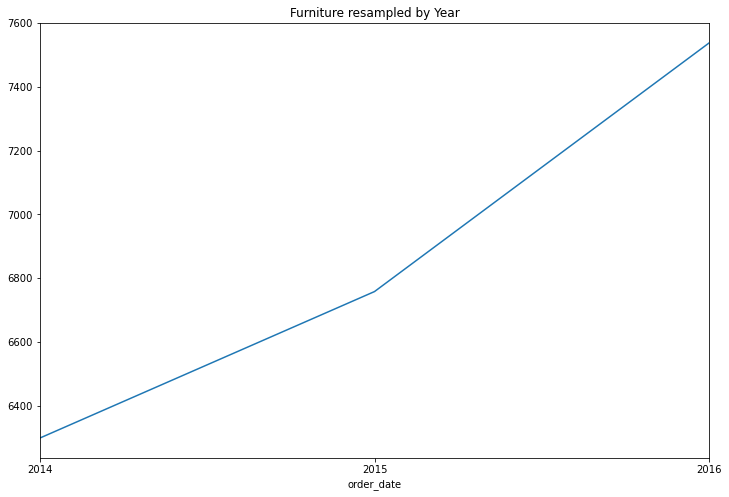

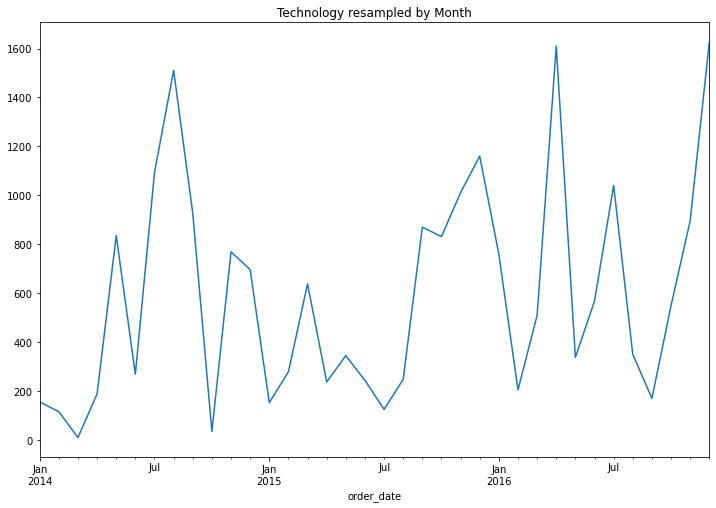

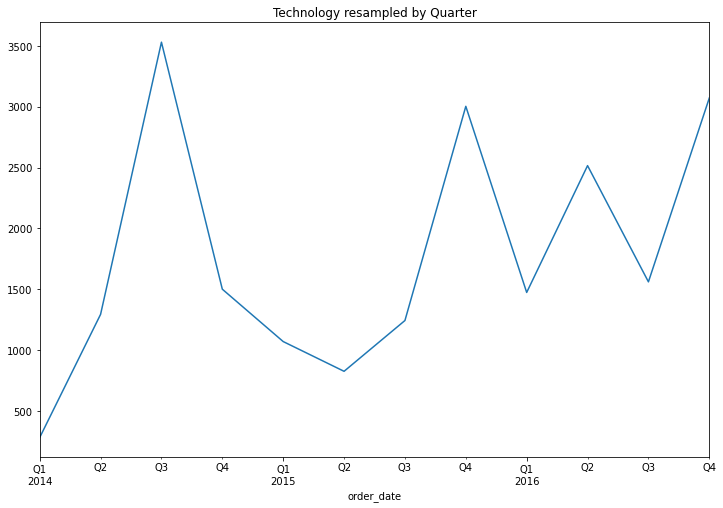

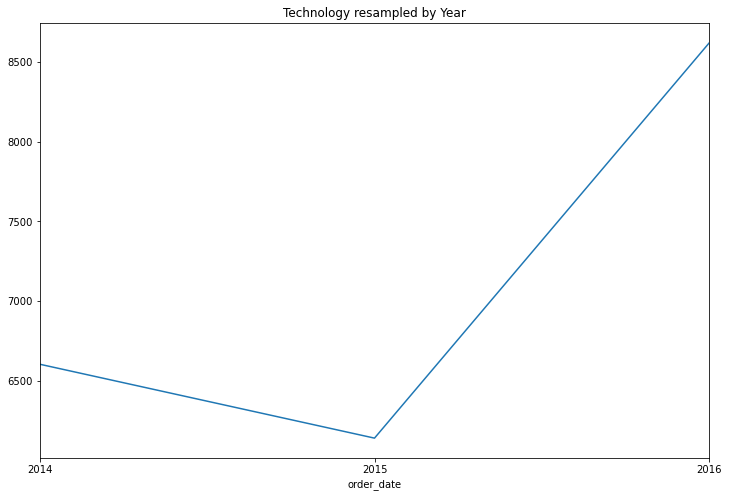

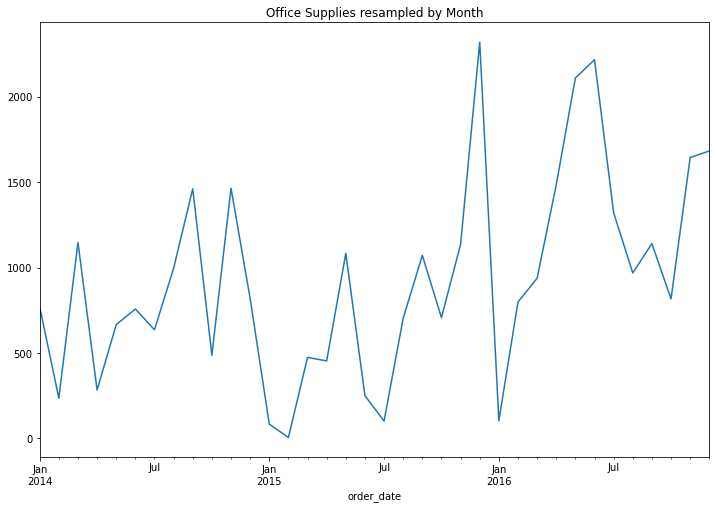

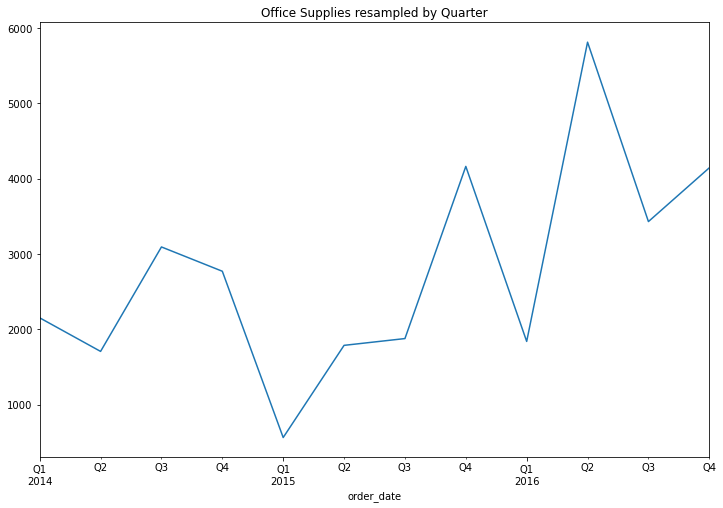

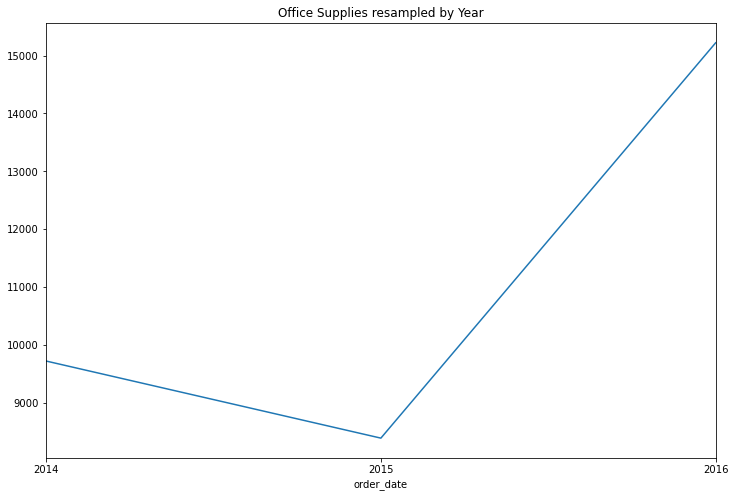

In [11]:
categories = [furniture, technology, office]
category_names = ['Furniture', 'Technology', 'Office Supplies']

periods = ['M', 'Q', 'Y']
period_names = ['Month', 'Quarter', 'Year']

for cat, cat_name in zip(categories, category_names):
    for per, per_name in zip(periods, period_names):
        plt.figure(figsize=(12,8))
        cat['sales'].resample(per).sum().plot()
        plt.title(f'{cat_name} resampled by {per_name}')

In [12]:
df = prep_data(df)

In [13]:
df.category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [14]:
df.order_date.min(), df.order_date.max()

(Timestamp('2014-01-04 00:00:00'), Timestamp('2017-12-30 00:00:00'))

#### Which category has the highest profit_per_product?

#### Which products have the most/least sales volume in the last year?

In [15]:
products_2017 = df['2017'].groupby(by='product_id').sum()[['sales', 'profit', 'quantity']]
products_2017['profit_per_product'] = products_2017.profit / products_2017.quantity
products_2017.sort_values(by='quantity', ascending=False)

,sales,profit,quantity,profit_per_product
product_id,,,,
OFF-AP-10002684,1799.384,267.4760,18.0,14.859778
OFF-AR-10003514,65.272,19.9398,17.0,1.172929
OFF-BI-10001036,56.668,-16.4520,16.0,-1.028250
FUR-FU-10001290,673.600,215.5520,16.0,13.472000
OFF-PA-10002377,137.376,50.9480,14.0,3.639143
...,...,...,...,...
OFF-ST-10003722,14.030,4.0687,1.0,4.068700
OFF-EN-10002504,21.744,7.3386,1.0,7.338600
OFF-AR-10000390,3.304,1.0738,1.0,1.073800


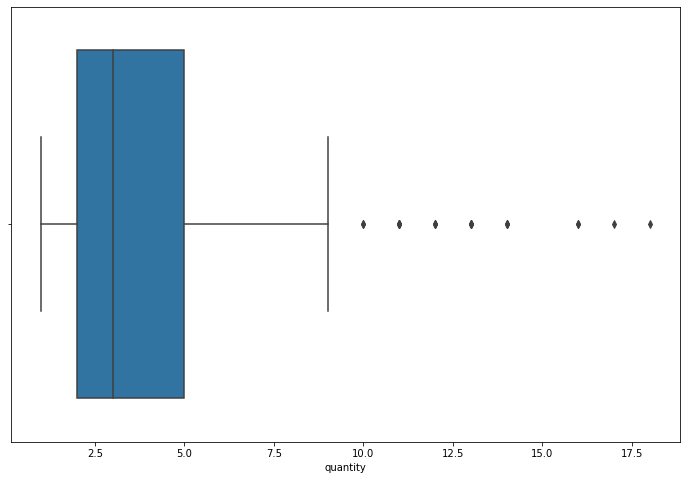

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(products_2017.quantity)
plt.show()

In [17]:
low_vol_prods = products_2017[products_2017.quantity <= 5]
low_vol_prods

,sales,profit,quantity,profit_per_product
product_id,,,,
FUR-BO-10001337,514.1650,-30.2450,5.0,-6.0490
FUR-BO-10001619,84.9800,18.6956,1.0,18.6956
FUR-BO-10002206,119.8330,-12.6882,1.0,-12.6882
FUR-BO-10002545,782.9400,203.5644,3.0,67.8548
FUR-BO-10002824,205.3328,-36.2352,2.0,-18.1176
...,...,...,...,...
TEC-PH-10004536,323.9760,20.2485,3.0,6.7495
TEC-PH-10004586,863.8800,107.9850,3.0,35.9950
TEC-PH-10004614,207.0000,51.7500,3.0,17.2500


In [18]:
low_vol_prods[low_vol_prods.profit_per_product == low_vol_prods.profit_per_product.max()]

,sales,profit,quantity,profit_per_product
product_id,,,,
TEC-MA-10000822,3059.982,679.996,2.0,339.998


### Which category has highest profit per product?

In [19]:
# average sales_per_product by category
train.groupby('category').mean()[['profit_per_product']]

,profit_per_product
category,
Furniture,4.535244
Office Supplies,2.985679
Technology,6.500177


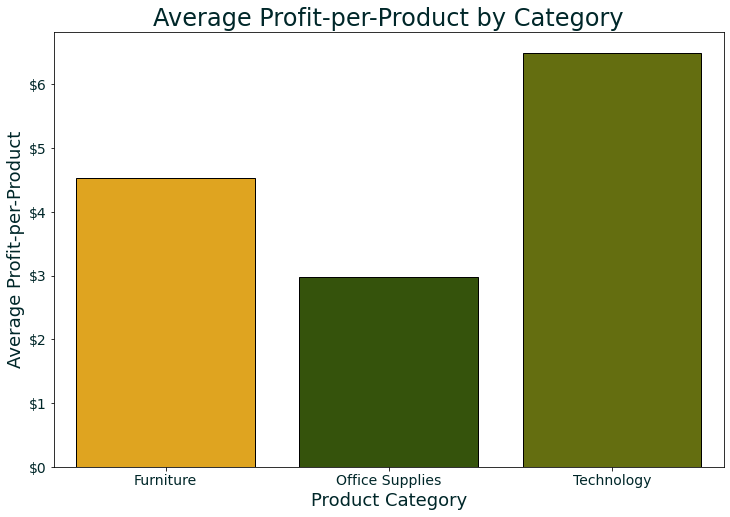

In [57]:
plt.figure(figsize=(12,8))
canva_palette = ['#FFB000', '#375F00', '#707E00', '#B39B00', '#002729']
sns.barplot(data=train, x='category', y='profit_per_product', 
            ci=None, ec='black', palette=canva_palette)
plt.title('Average Profit-per-Product by Category', fontsize=24, color='#002729')
plt.ylabel('Average Profit-per-Product', fontsize=18, color='#002729')
plt.xlabel('Product Category', fontsize=18, color='#002729')
plt.xticks(fontsize=14, color='#002729')
plt.yticks(fontsize=14, color='#002729')
ax = plt.gca()
ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])
plt.savefig('fig_profit_per_product_by_category.jpeg')
plt.show()


### Which category has lowest sales volume per product?

In [21]:
# total volume of sales by category
train.groupby('category').sum()[['quantity']]

,quantity
category,
Furniture,532.0
Office Supplies,2391.0
Technology,509.0


<AxesSubplot:xlabel='category'>

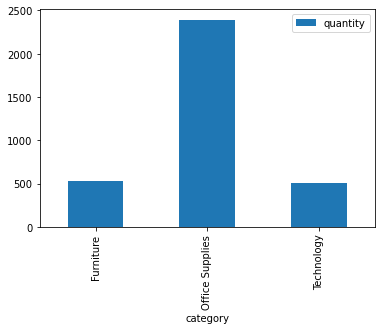

In [22]:
train.groupby('category').sum()[['quantity']].plot.bar()

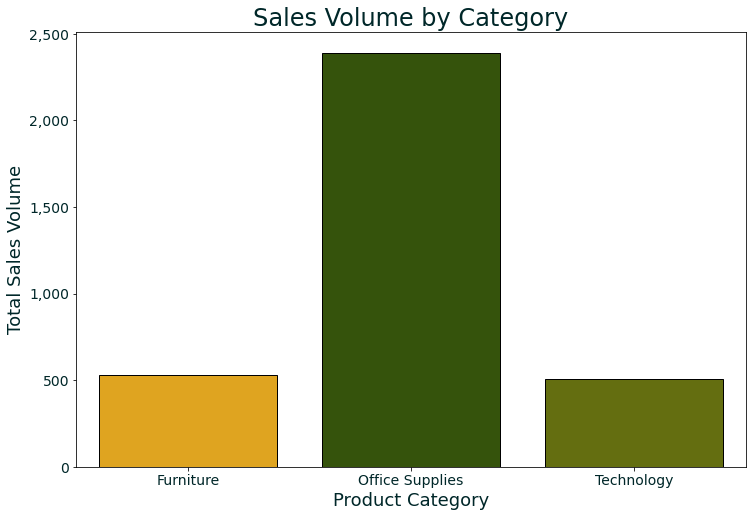

In [59]:
plt.figure(figsize=(12,8))
canva_palette = ['#FFB000', '#375F00', '#707E00', '#B39B00', '#002729', ]
sns.barplot(data=train, x='category', y='quantity', 
            estimator=sum, ci=None, ec='black', palette=canva_palette)
plt.title('Sales Volume by Category', fontsize=24, color='#002729')
plt.ylabel('Total Sales Volume', fontsize=18, color='#002729')
plt.xlabel('Product Category', fontsize=18, color='#002729')
plt.xticks(fontsize=14, color='#002729')
plt.yticks(fontsize=14, color='#002729')
ax = plt.gca()
ax.set_yticklabels([f'{tick:,.0f}' for tick in ax.get_yticks()])
plt.savefig('fig_sales_volume_by_category.jpeg')
plt.show()

# Creating hypothetical sales data for 2017 
### based on a recommended expansion of the technology product line
#### i.e.: what happens if we double our technology sales?

#### What happens if we double technology sales excluding sales with discounts over 35%

In [24]:
hypo_tech_sales_17 = test[test.category == 'Technology']
hypo_tech_sales_17 = hypo_tech_sales_17[hypo_tech_sales_17.discount <= .35]

In [25]:
hypothetical_17 = pd.concat([test, hypo_tech_sales_17])

In [26]:
len(hypothetical_17)

471

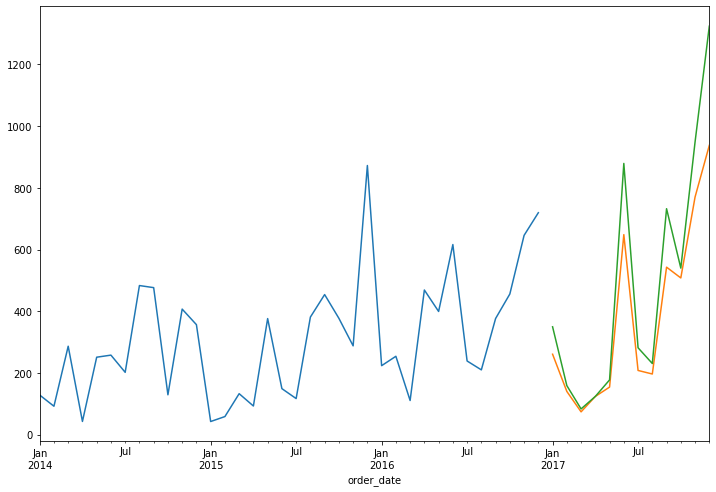

In [27]:
plt.figure(figsize=(12,8))
train['profit'].resample('M').sum().plot()
test['profit'].resample('M').sum().plot()
hypothetical_17['profit'].resample('M').sum().plot()
plt.show()

In [28]:
profits = pd.DataFrame()
profits['actual_2017'] = test.resample('M')['profit'].sum()
profits['projected_2017'] = hypothetical_17.resample('M')['profit'].sum()
profits['difference'] = profits.projected_2017 - profits.actual_2017
profits['difference_pct'] = profits.difference / profits.actual_2017
profits['rolling_total_actual'] = profits.actual_2017.cumsum()
profits['rolling_total_projected'] = profits.projected_2017.cumsum()
profits.index = profits.index.strftime('%b')
profits.index.name = 'month'

In [29]:
# project monthly difference in profit
profits.difference_pct.mean()

0.22431152677553604

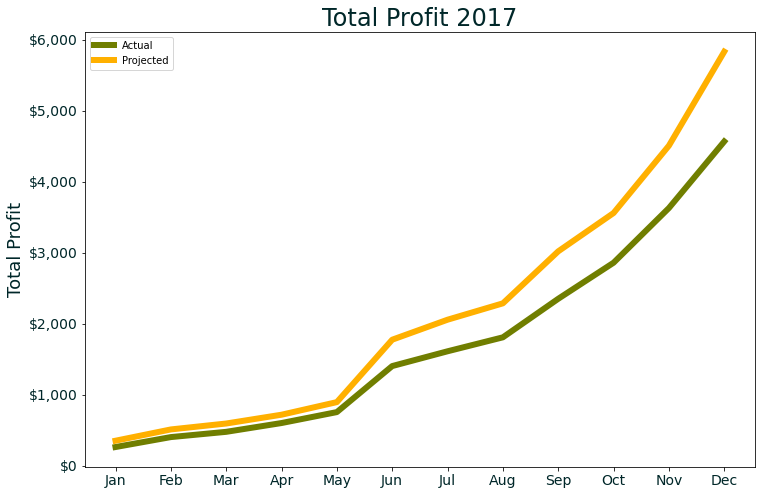

In [60]:
plt.figure(figsize=(12,8))
sns.lineplot(data=profits, x=profits.index, y='rolling_total_actual', 
             color='#707E00', label='Actual', lw=6)
sns.lineplot(data=profits, x=profits.index, y='rolling_total_projected', 
             color='#FFB000', label='Projected', lw=6)
plt.title('Total Profit 2017', fontsize=24, color='#002729')
plt.ylabel('Total Profit', fontsize=18, color='#002729')
plt.xlabel(None)
plt.xticks(fontsize=14, color='#002729')
plt.yticks(fontsize=14, color='#002729')
ax = plt.gca()
ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])
plt.savefig('fig_total_profit_2017.jpeg')
plt.show()

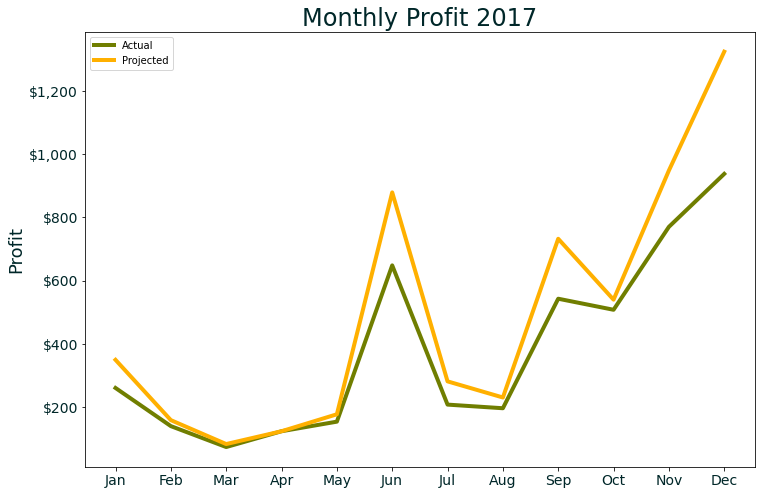

In [61]:
plt.figure(figsize=(12,8))
sns.lineplot(data=profits, x=profits.index, y='actual_2017', 
             color='#707E00', label='Actual', lw=4)
sns.lineplot(data=profits, x=profits.index, y='projected_2017', 
             color='#FFB000', label='Projected', lw=4)
plt.title('Monthly Profit 2017', fontsize=24, color='#002729')
plt.ylabel('Profit', fontsize=18, color='#002729')
plt.xlabel(None)
plt.xticks(fontsize=14, color='#002729')
plt.yticks(fontsize=14, color='#002729')
ax = plt.gca()
ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])
plt.savefig('fig_monthly_profit_2017.jpeg')
plt.show()

In [32]:
profits

,actual_2017,projected_2017,difference,difference_pct,rolling_total_actual,rolling_total_projected
month,,,,,,
Jan,260.6796,349.5678,88.8882,0.340986,260.6796,349.5678
Feb,140.0672,158.9644,18.8972,0.134915,400.7468,508.5322
Mar,73.9582,83.3863,9.4281,0.127479,474.7050,591.9185
Apr,123.8829,123.8829,0.0000,0.000000,598.5879,715.8014
May,154.1815,177.4663,23.2848,0.151022,752.7694,893.2677
Jun,648.2269,878.9648,230.7379,0.355952,1400.9963,1772.2325
Jul,208.0872,281.5752,73.4880,0.353160,1609.0835,2053.8077
Aug,196.5882,230.5786,33.9904,0.172902,1805.6717,2284.3863
Sep,542.8292,732.2697,189.4405,0.348987,2348.5009,3016.6560


In [33]:


test.groupby(test.index.month)['profit'].sum()

order_date
1     260.6796
2     140.0672
3      73.9582
4     123.8829
5     154.1815
6     648.2269
7     208.0872
8     196.5882
9     542.8292
10    507.8726
11    770.0274
12    937.4754
Name: profit, dtype: float64

In [34]:
hypothetical_17.groupby(hypothetical_17.index.month)[['profit']].sum()

,profit
order_date,
1,349.5678
2,158.9644
3,83.3863
4,123.8829
5,177.4663
6,878.9648
7,281.5752
8,230.5786
9,732.2697


# some standard explorations

#### findings:
- sales/profits tend to be:
    - higher later in the year
    - lower in the middle of the week
- seasonal decomposition shows an upward trend, though this trend is hard to see in the raw data

### univariate

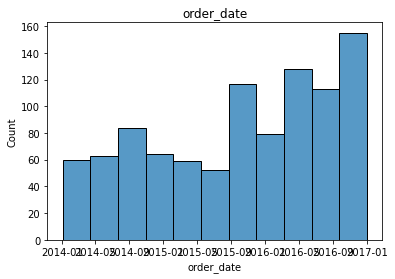

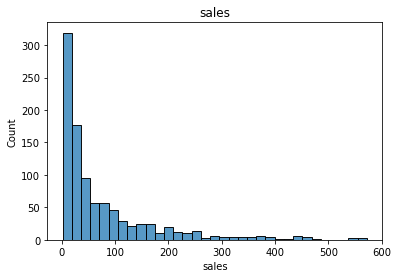

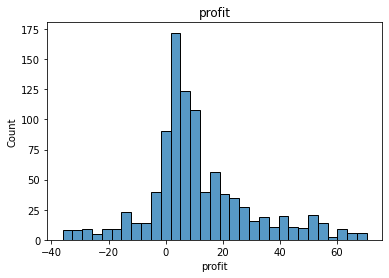

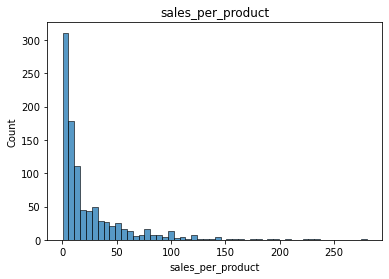

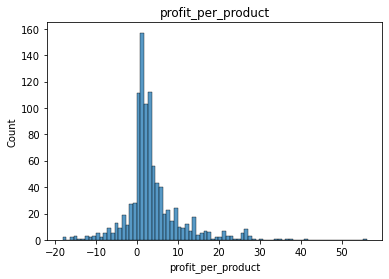

In [35]:
cols = ['order_date', 'sales', 'profit', 'sales_per_product', 'profit_per_product',]

for col in cols:
    sns.histplot(train[col])
    plt.title(col)
    plt.show()

## bivariate

#### sales and profit over time - hue=category

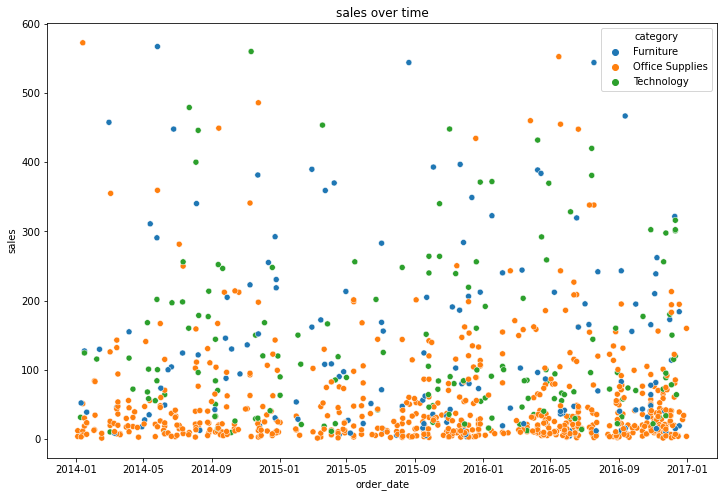

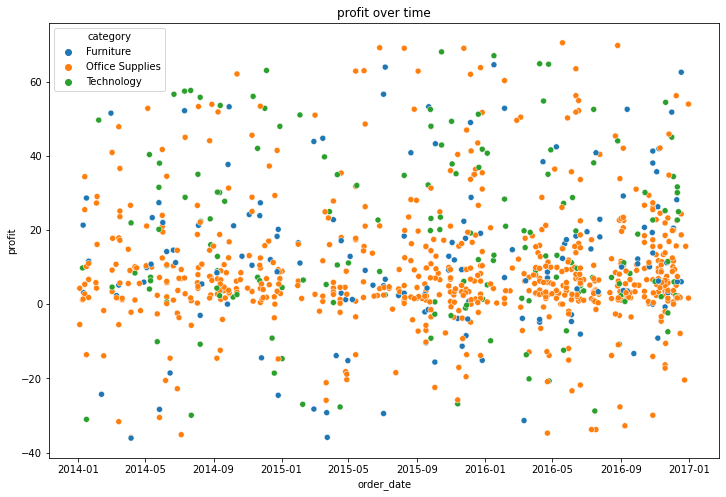

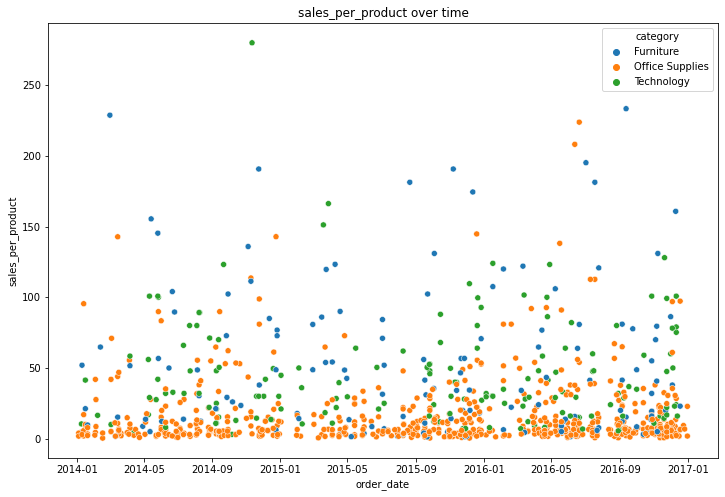

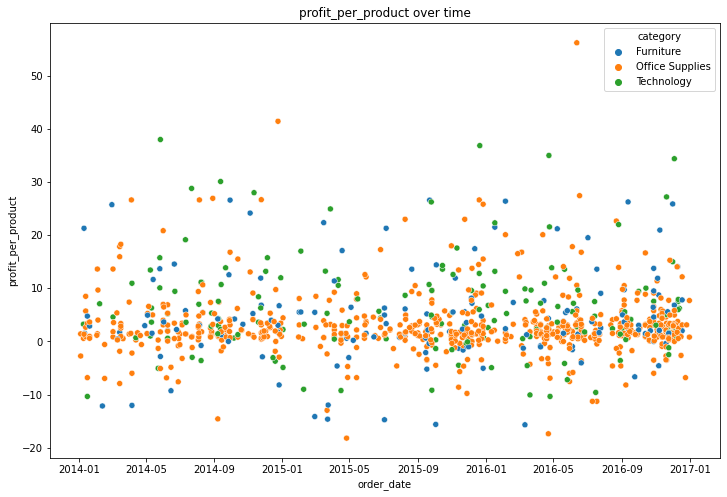

In [36]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='category')
    plt.title(f'{col} over time')
    plt.show()

#### sales and profit over time - hue=region

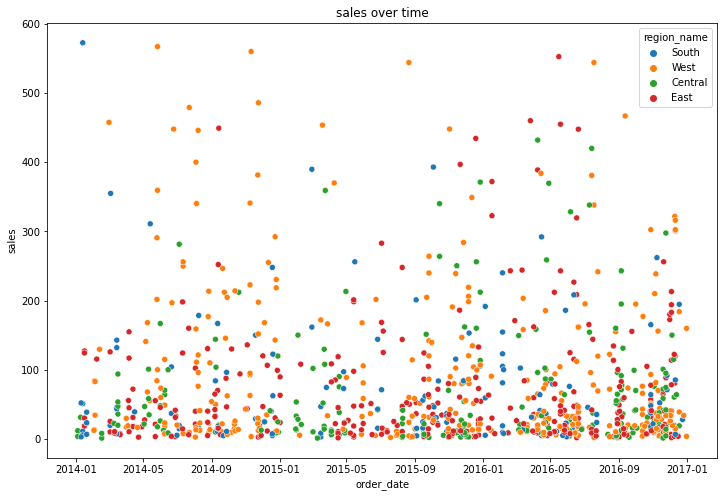

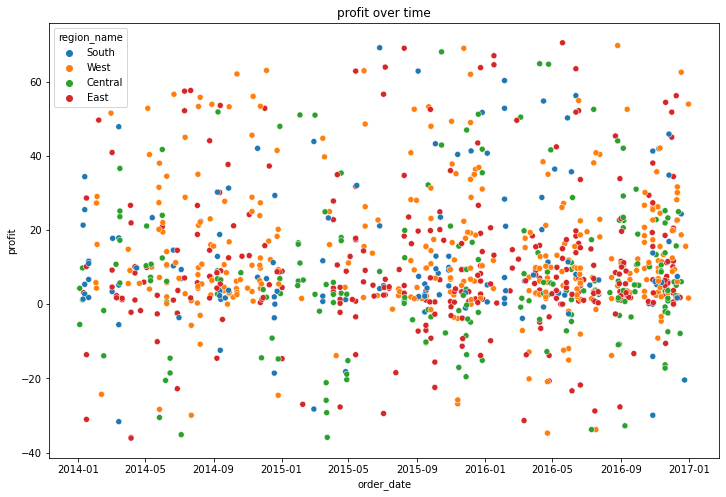

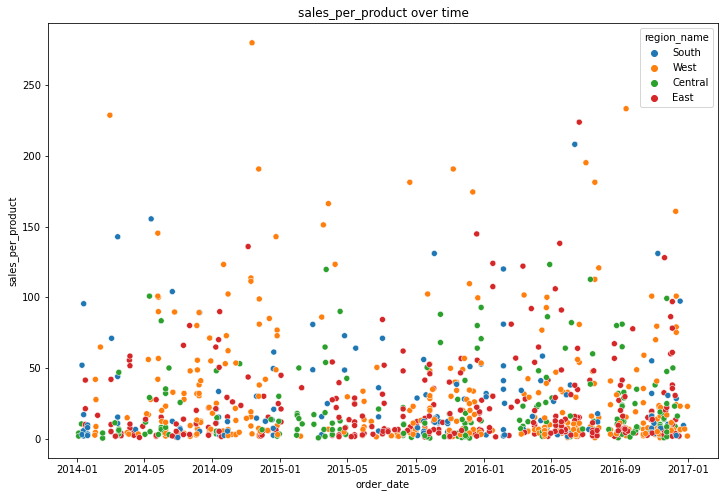

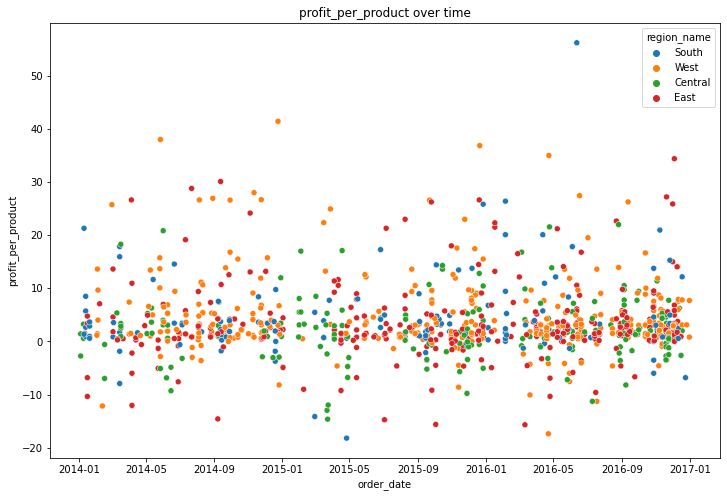

In [37]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='region_name')
    plt.title(f'{col} over time')
    plt.show()

#### sales and profit over time - hue=segment

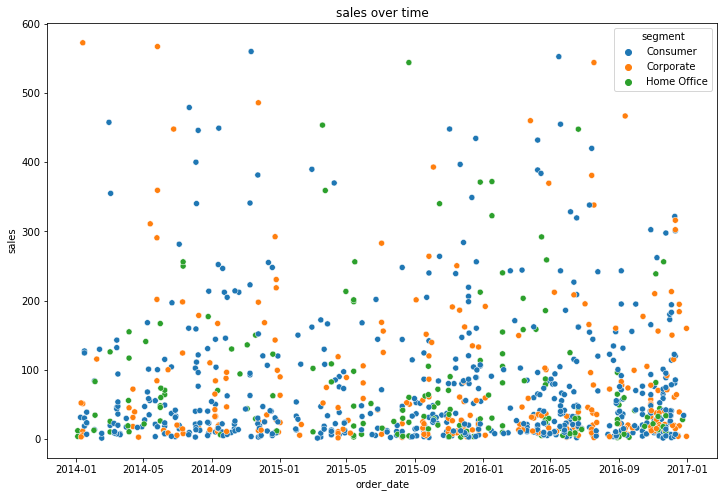

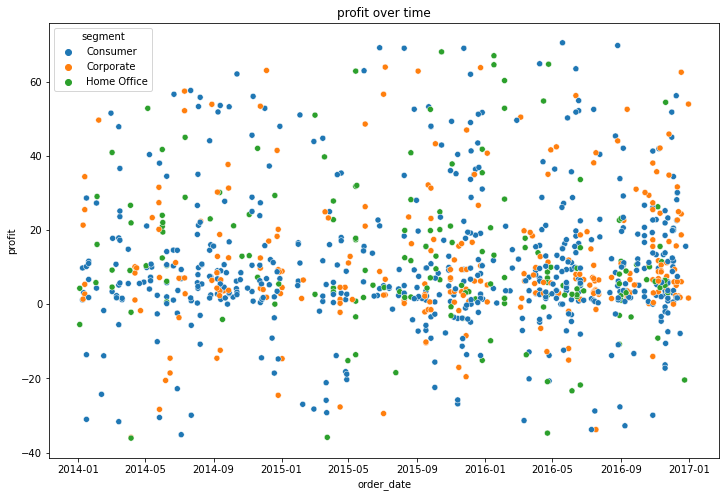

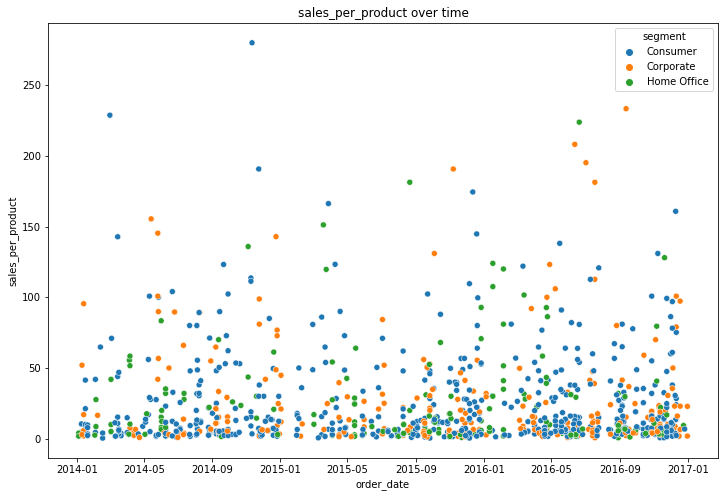

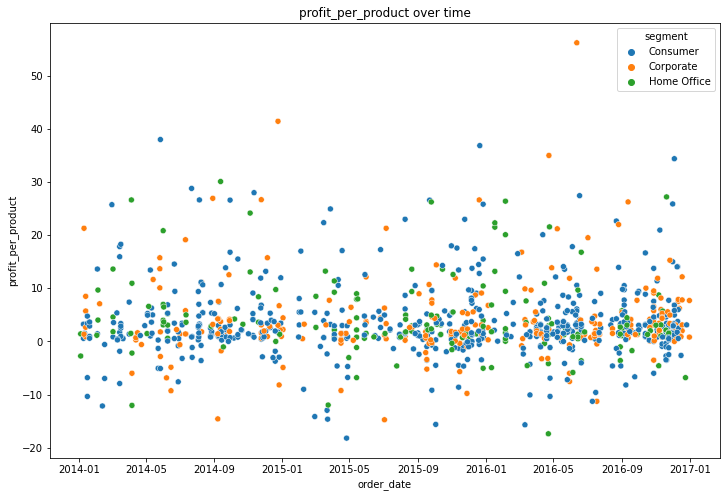

In [38]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='segment')
    plt.title(f'{col} over time')
    plt.show()

#### sales and profit over time - hue=ship_mode

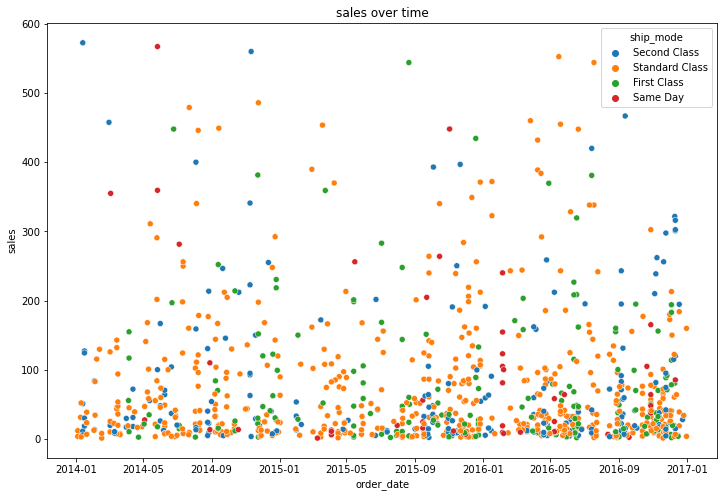

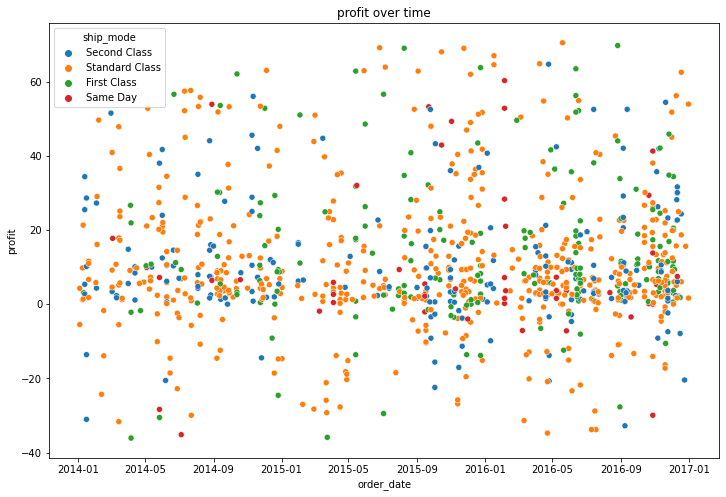

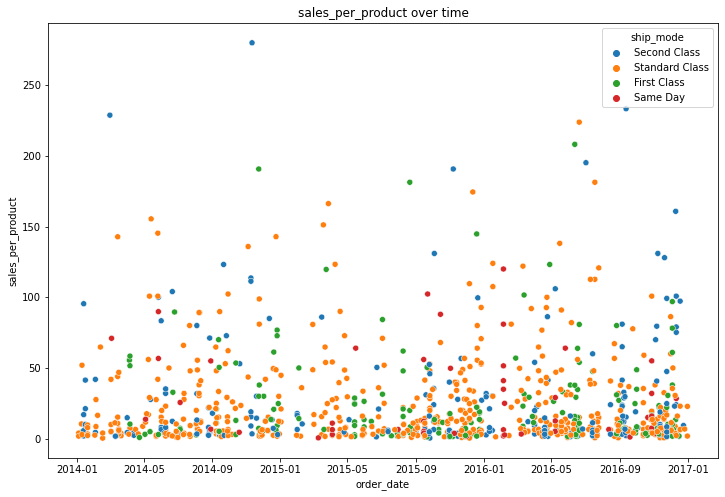

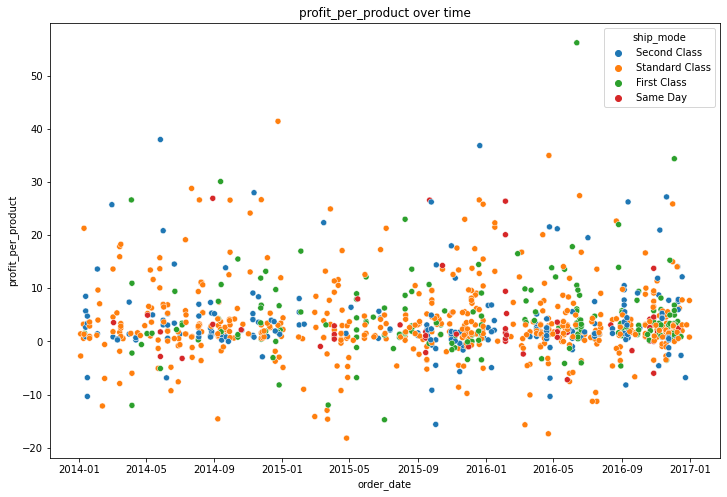

In [39]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='ship_mode')
    plt.title(f'{col} over time')
    plt.show()

#### sales volume by category

#### sales and profit by category

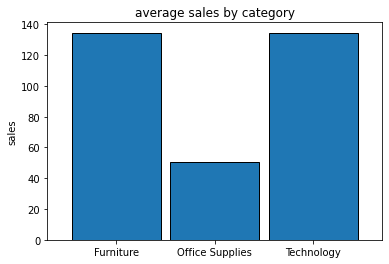

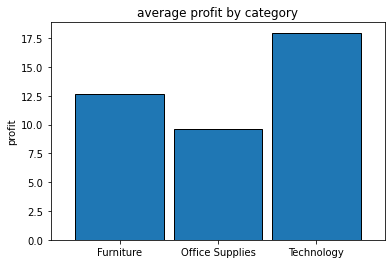

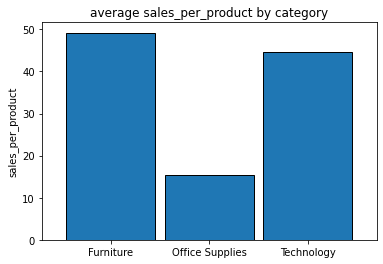

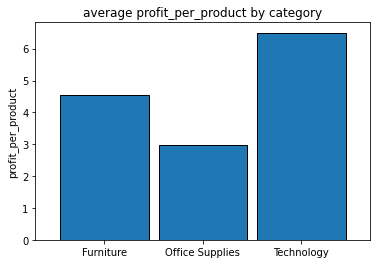

In [40]:
for col in cols:
    train.groupby('category')[col].mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel(None)
    plt.ylabel(col)
    plt.title(f'average {col} by category')
    plt.show()

#### sales and profit by region

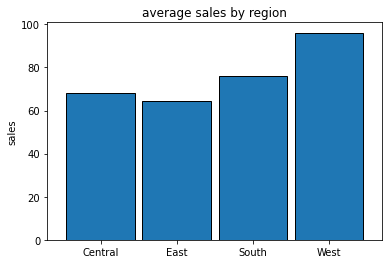

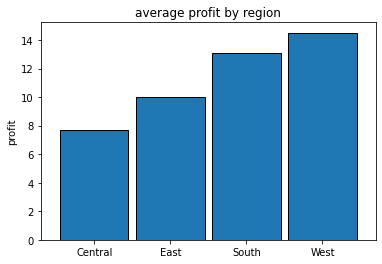

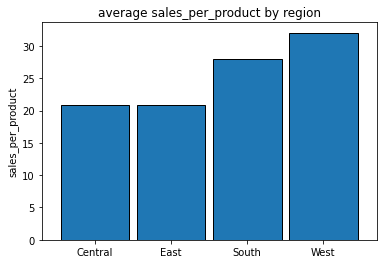

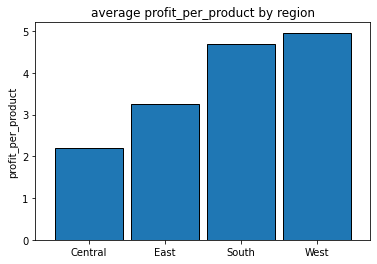

In [41]:
for col in cols:
    train.groupby('region_name')[col].mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel(None)
    plt.ylabel(col)
    plt.title(f'average {col} by region')
    plt.show()

## time series exploration

#### since there are multiple observations on any given day, time series explorations don't make sense unless we resample by day

In [42]:
train_resampled = train.resample('D').sum()

#### averages by month

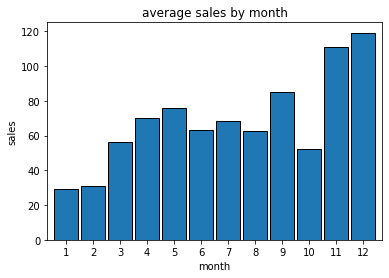

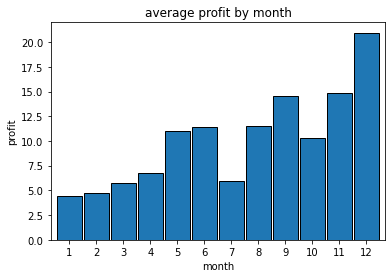

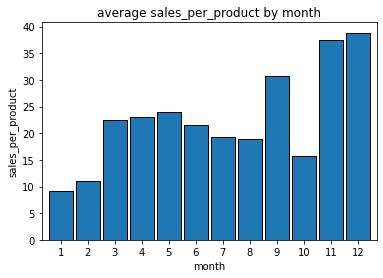

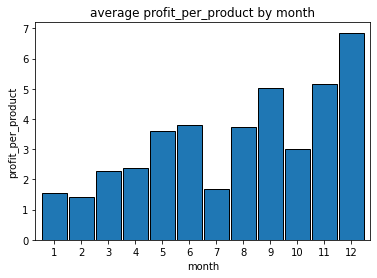

In [43]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    train_resampled[col].groupby(train_resampled.index.month).mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel('month')
    plt.ylabel(col)
    plt.title(f'average {col} by month')
    plt.show()


#### averages by weekday

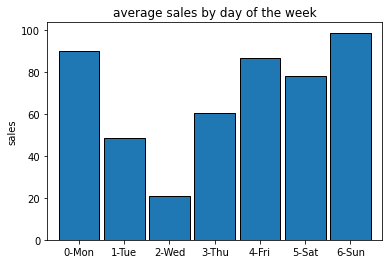

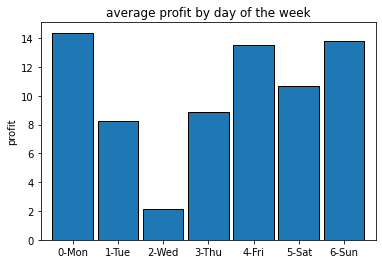

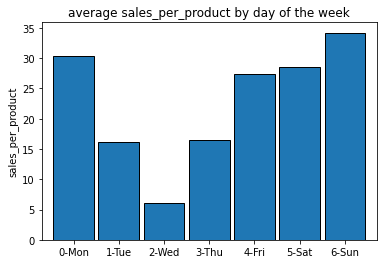

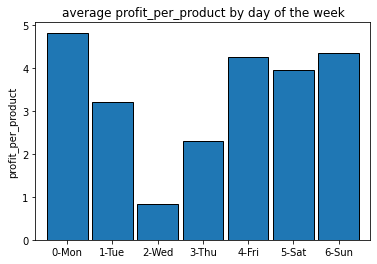

In [44]:
train_resampled['weekday'] = train_resampled.index.weekday.astype(str) + '-' + train_resampled.index.strftime('%a')
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']

for col in cols:
    train_resampled.groupby('weekday')[col].mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel(None)
    plt.ylabel(col)
    plt.title(f'average {col} by day of the week')
    plt.show()

#### resampled averages

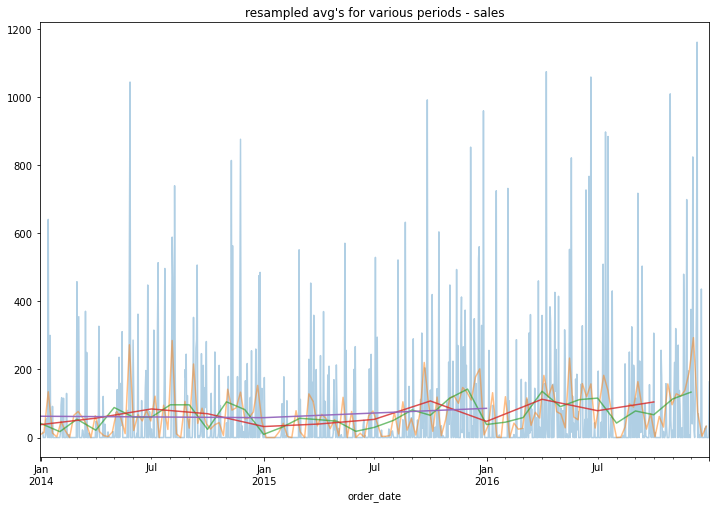

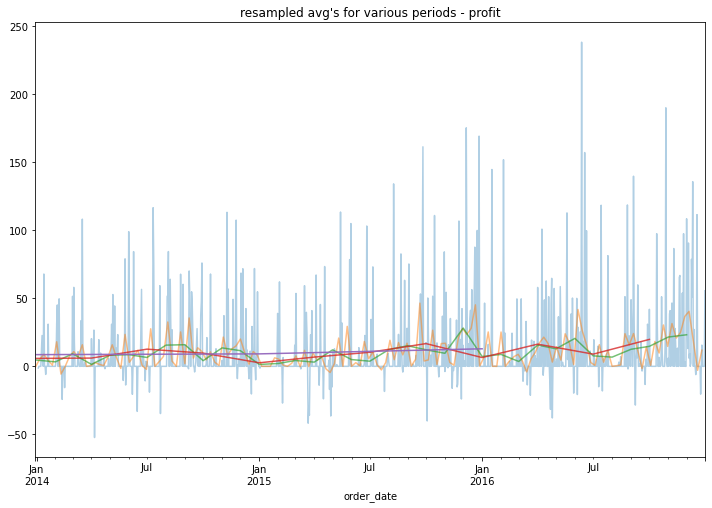

In [45]:
periods = ['D', 'W', 'M','Q', 'Y']
cols = ['sales', 'profit']
for col in cols:
    plt.figure(figsize=(12,8))
    plt.title(f'resampled avg\'s for various periods - {col}')
    alpha = .2
    for per in periods:
        alpha += .15
        train_resampled[col].resample(per).mean().plot(alpha=alpha) 
    plt.show()

#### change from period-to-period

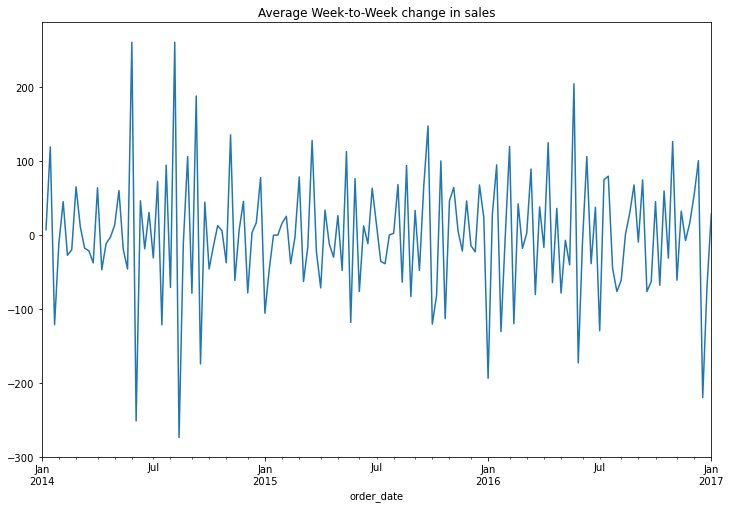

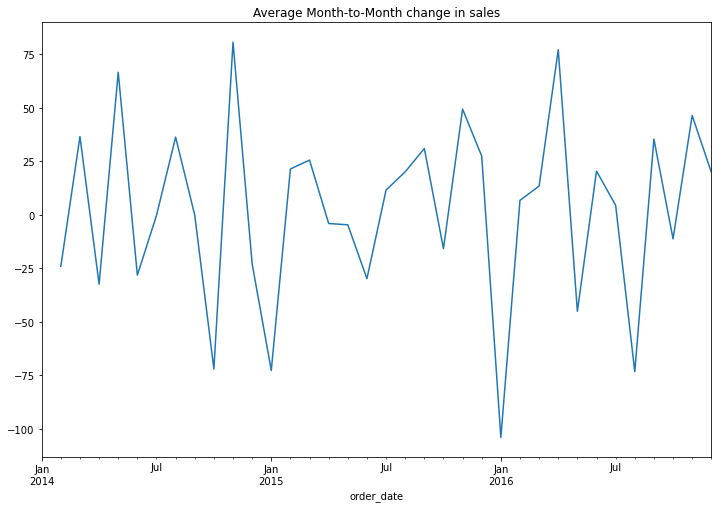

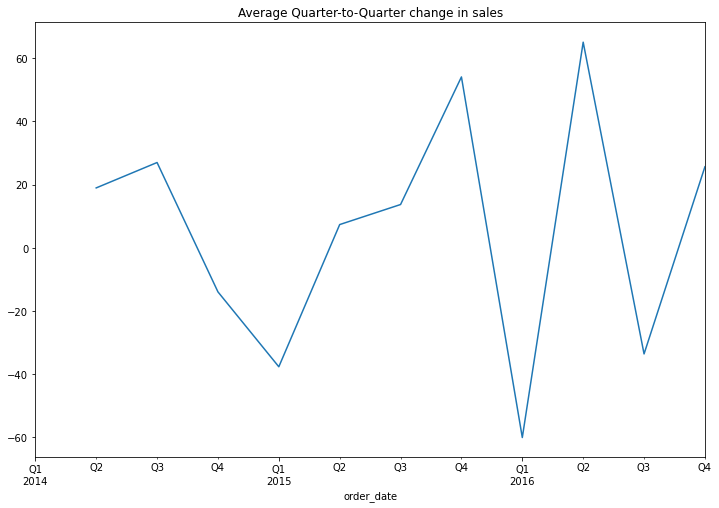

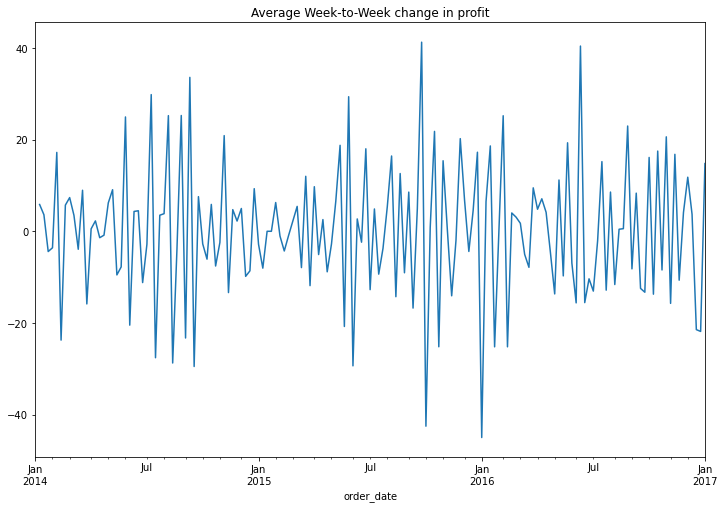

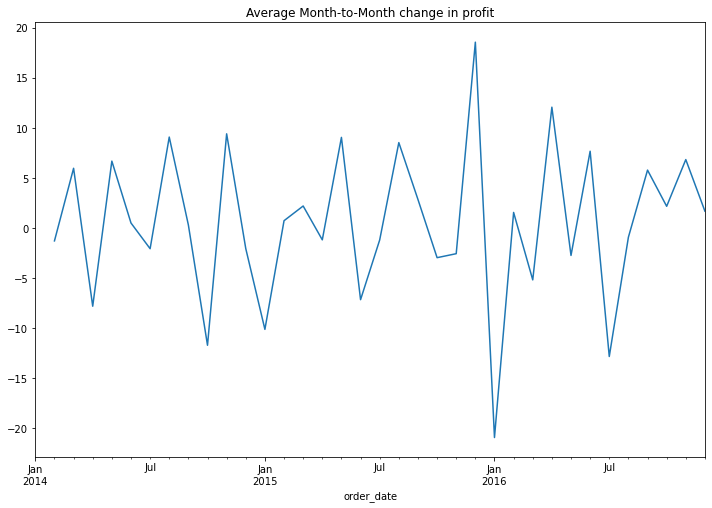

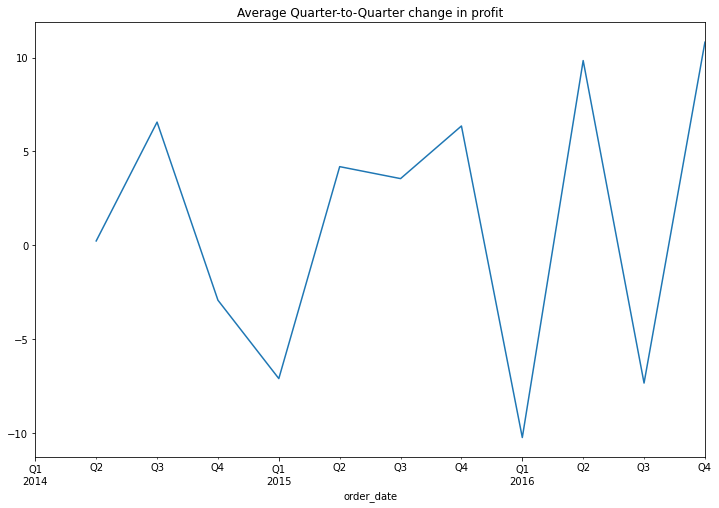

In [46]:
per = ['W', 'M', 'Q'] # list of periods by which to resample
per_name = ['Week', 'Month', 'Quarter'] # readable names of those periods
cols = ['sales', 'profit']
for col in cols:
    for i in range(len(per)):
        plt.figure(figsize=(12,8))
        train_resampled[col].resample(per[i]).mean().diff().plot(title=f'Average {per_name[i]}-to-{per_name[i]} change in {col}')
        plt.show()

#### Lag plots

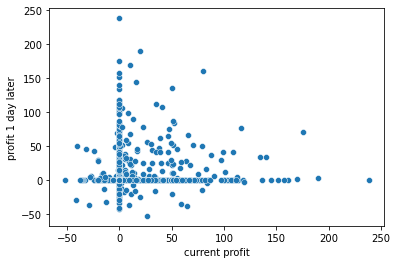

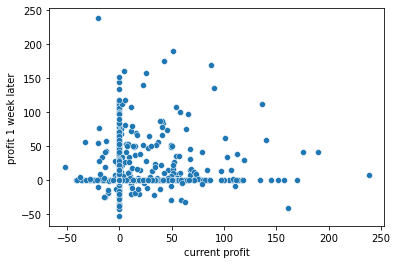

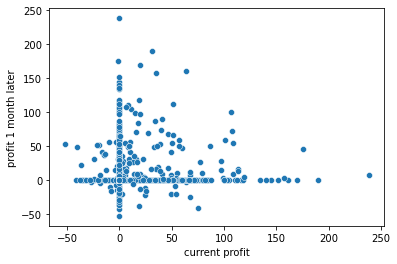

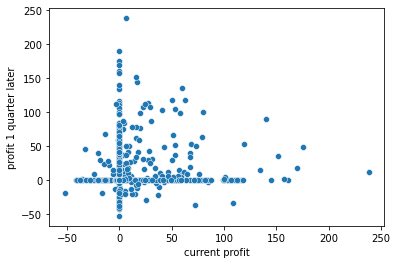

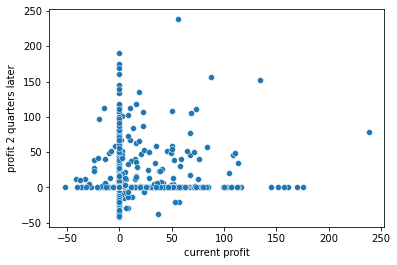

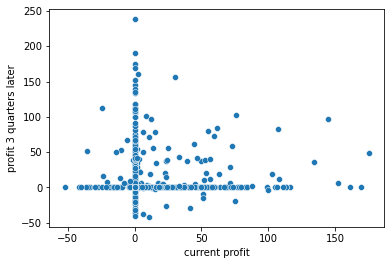

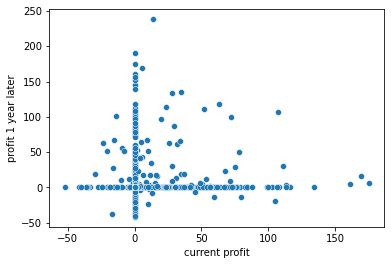

In [47]:
lag_times = [1, 7, 30, 30*3, 30*6, 30*9, 365]
lag_labels = ['1 day', '1 week', '1 month', '1 quarter', '2 quarters', '3 quarters', '1 year']

target = 'profit'
for lag_time, lag_label in zip(lag_times, lag_labels):
    sns.scatterplot(data=train_resampled, x=target, y=train_resampled[target].shift(-lag_time))
    plt.xlabel(f'current {target}')
    plt.ylabel(f'{target} {lag_label} later')
    plt.show()

#### seasonal decomposition

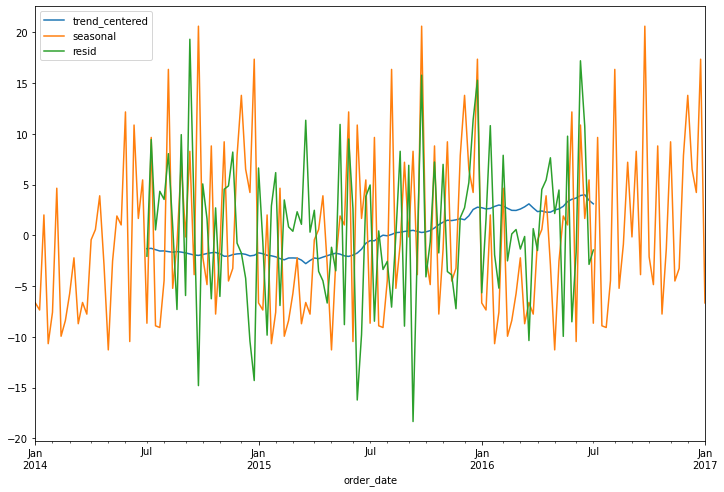

In [64]:
import statsmodels.api as sm

train_resampled = train.resample('D').sum()
target = 'profit'
y = train_resampled[target].resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({'y': result.observed,
                             'trend': result.trend,
                             'seasonal': result.seasonal,
                             'resid': result.resid,})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot(figsize=(12,8))
plt.show()